In [1]:
# Load .env variables in environment

%reload_ext dotenv
%dotenv

In [2]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import hopsworks
import pandas as pd

In [4]:
project = hopsworks.login()
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/209044
Connected. Call `.close()` to terminate connection gracefully.


In [5]:
iris_df = pd.read_csv("https://repo.hops.works/master/hopsworks-tutorials/data/iris.csv")
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris_df['variety'].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

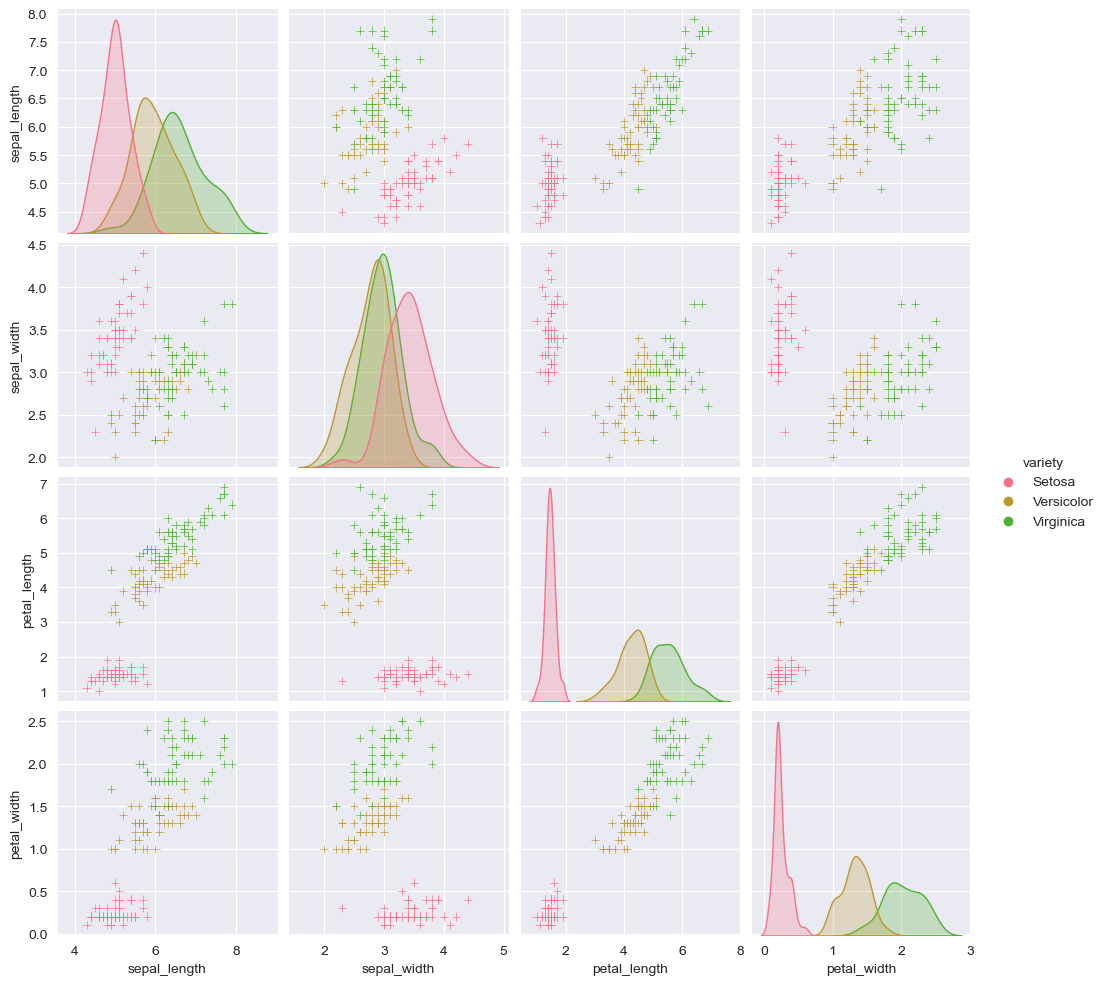

In [9]:
g = sns.pairplot(iris_df, hue='variety', markers='+')
plt.show()

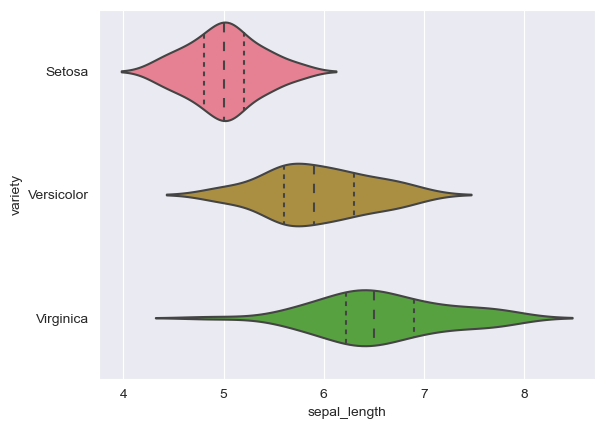

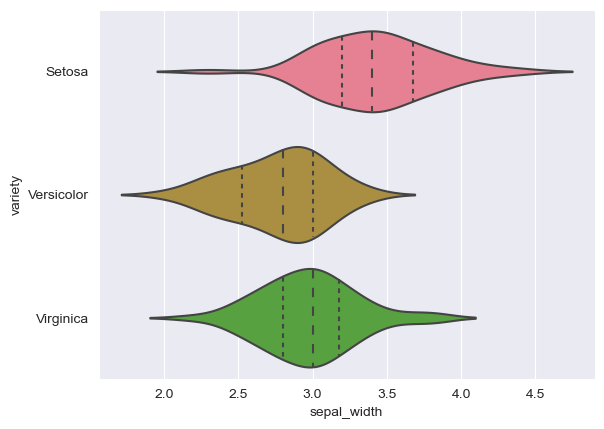

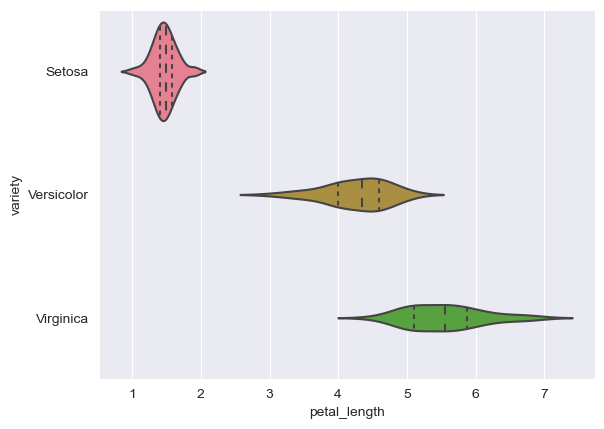

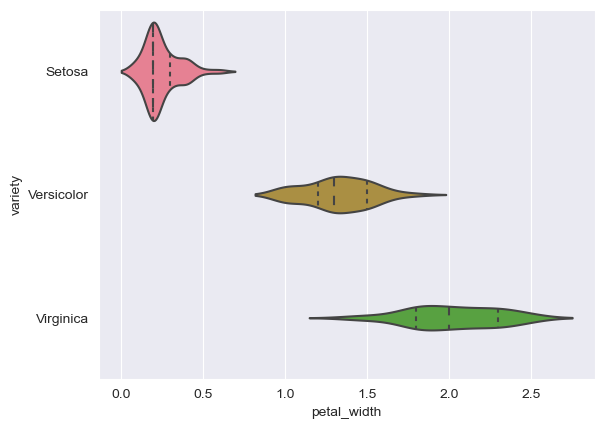

In [10]:
g = sns.violinplot(y='variety', x='sepal_length', data=iris_df, inner='quartile')
plt.show()
g = sns.violinplot(y='variety', x='sepal_width', data=iris_df, inner='quartile')
plt.show()
g = sns.violinplot(y='variety', x='petal_length', data=iris_df, inner='quartile')
plt.show()
g = sns.violinplot(y='variety', x='petal_width', data=iris_df, inner='quartile')
plt.show()

### Insert our Iris DataFrame into a FeatureGroup
Let's write our historical iris feature values and labels to a feature group. When you write historical data, this process is called backfilling.

In [11]:
iris_fg = fs.get_or_create_feature_group(
    name="iris",
    version=1,
    primary_key=["sepal_length","sepal_width","petal_length","petal_width"], 
    description="Iris flower dataset")
iris_fg.insert(iris_df)

Uploading Dataframe: 0.00% |          | Rows 0/150 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: iris_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/209044/jobs/named/iris_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x29f99be80>, None)